# 1、先尝试调用sklearn的线性回归模型训练数据，尝试以下代码，画图查看分类的结果

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
df_X = pd.read_csv('/home/jiale/codes/AI_JOB_Notes/Datawhale/team-learning_back/初级算法梳理/logistic_x.txt', sep='\ +', header=None, engine='python')  # 读取X值
ys = pd.read_csv('/home/jiale/codes/AI_JOB_Notes/Datawhale/team-learning_back/初级算法梳理/logistic_y.txt', sep='\ +', header=None, engine='python')  # 读取y值
ys = ys.astype(int)
df_X['label'] = ys[0].values  # 将X按照y值的结果一一打标签

In [172]:
df_X.head()

,0,1,label
0,1.343250,-1.331148,0
1,1.820553,-0.634668,0
2,0.986321,-1.888576,0
3,1.944373,-1.635452,0
4,0.976734,-1.353315,0


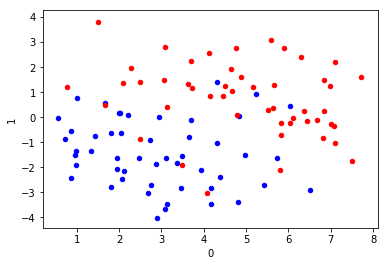

In [173]:
ax = plt.axes()
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [174]:
#提取用于学习的数据
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) 
ys = df_X['label'].values

In [175]:
Xs[0:5]

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ],
       [ 1.        ,  1.9443734 , -1.635452  ],
       [ 1.        ,  0.97673352, -1.3533151 ]])

In [176]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)


Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899


/home/jiale/python3-tf-gpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


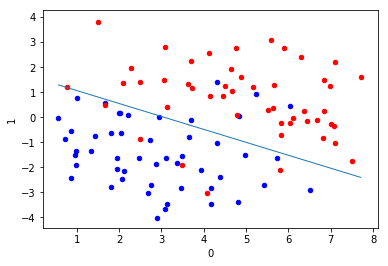

In [177]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
# 0 = k + w1*x + w2 * y 
# y = (k + w1*x) / (-w2)
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
# 绘制两个端点
plt.plot(_xs, _ys, lw=1)

# 2 用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

In [201]:
from tqdm import tqdm

In [202]:
class LGR_GD():
    def __init__(self):
        self.w = None
        self.n_iters = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def net_input(self, x):
        # Computes the weighted sum of inputs
        return np.dot(x, self.w.T)

    def cost(self, X, y, penalty, C):
        left = np.multiply(-y, np.log(self.sigmoid(self.net_input(X))))
        right = np.multiply(1 - y, np.log(1 - self.sigmoid(self.net_input(X))))
        if penalty is None:
            reg_term = 0
        else:
            theta = self.w[0][1:]
            reg_term = (1 / (2 * X.shape[0])) * np.dot(theta, theta.T)
        return np.sum(left - right ) / len(X) + reg_term

    def fit(self, X, y, alpha=1, loss=1e-10, penalty=None, C=1):  # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1, 1)  # 重塑y值的维度以便矩阵运算
        [m, d] = np.shape(X)  # 自变量的维度
        self.w = np.zeros((1, d))  # 将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        cost_old = tol
        fig, ax = plt.subplots()
        y1 = []
        # ============================= show me your code =======================
        while tol > loss:  # 设置收敛条件
#         for k in tqdm(range(1000)):
#             # implementation1:
#             w_deriv = 0
#             for i in range(m):
#                 w_deriv += np.multiply(self.sigmoid(self.net_input(X[i])) - y[i], X[i])
                
            # implementation2:
            if penalty is None:
                w_deriv = np.dot((self.sigmoid(self.net_input(X)) - y).T, X)
                self.w -= w_deriv/m * alpha
            else:
                w_deriv = np.dot((self.sigmoid(self.net_input(X)) - y).T, X)
                self.w -= C * w_deriv/m * alpha +  np.sum(self.w[0][1:])/m
            
            tol = abs(self.cost(X, y, penalty=penalty, C=C)-cost_old)
            cost_old = self.cost(X, y, penalty=penalty, C=C)
            
            self.n_iters += 1  # 更新迭代次数

            # plot
            y1.append(np.log(tol))
            ax.cla()
            ax.set_title("Loss-Iteration")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("log(Loss)")
            ax.grid()
            ax.plot(y1, label='train')
            ax.legend(loc='best')
        # ============================= show me your code =======================

    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = self.sigmoid(self.net_input(X))
        #         y_pred = X.dot(self.w)
        return y_pred
         #============================= show me your code =======================
    

估计的参数值为：[[-2.61993824  0.76024545  1.17190459]]


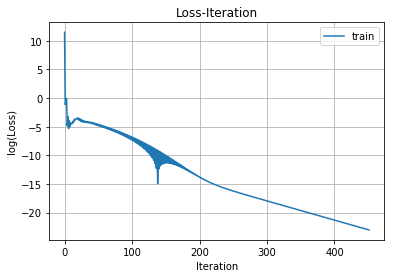

In [203]:
if __name__ == "__main__":
    lr_gd = LGR_GD()
    lr_gd.fit(Xs,ys)
    print("估计的参数值为：%s" %(lr_gd.w))

In [204]:
print(lr_gd.n_iters)

452


估计的参数值为：[[-3.59283786  0.94936662  1.1159201 ]]


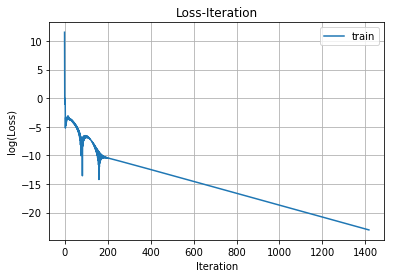

In [205]:
if __name__ == "__main__":
    lgr_gd = LGR_GD()
    lgr_gd.fit(Xs,ys,penalty="l2")
    print("估计的参数值为：%s" %(lgr_gd.w))

In [206]:
print(lr_gd.n_iters)

1417


# 3 用牛顿法实现结果，画图和sklearn的结果相比较，并比较牛顿法和梯度下降法迭代收敛的次数

In [237]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def net_input(self, x):
        # Computes the weighted sum of inputs
        return np.dot(x, self.w.T)

    def cost(self, X, y):
        left = np.multiply(-y, np.log(self.sigmoid(self.net_input(X))))
        right = np.multiply(1 - y, np.log(1 - self.sigmoid(self.net_input(X))))
        return np.sum(left - right)

    def fit(self, X, y, loss=1e-10):  # 判断是否收敛的条件为1e-10
        y = y.reshape(-1, 1)  # 重塑y值的维度以便矩阵运算
        [m, d] = np.shape(X)  # 自变量的维度
        self.w = np.zeros((1, d))  # 将参数的初始值定为0
        tol = 1e5
        n_iters = 0
        Hessian = np.zeros((d, d))
        cost_old = tol
        fig, ax = plt.subplots()
        y1 = []
        # ============================= show me your code =======================
        while tol > loss:
            mu = self.sigmoid(self.net_input(X))
            w_deriv = np.dot((mu - y).T, X)
            S = mu * (1-mu) * np.eye(m)
            H = np.mat(X.T) * S * np.mat(X)
            self.w -= w_deriv * H.I
            tol = abs(self.cost(X, y) - cost_old)
            cost_old = self.cost(X, y)
            n_iters += 1
            # ============================= show me your code =======================

            # plot
            y1.append(tol)
            ax.cla()
            ax.set_title("Loss")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Loss")
            ax.grid()
            ax.plot(y1, label='train')
            ax.legend(loc='best')
        self.n_iters = n_iters

    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred

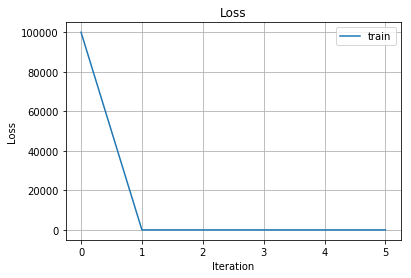

In [238]:
if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)

In [239]:
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

牛顿法结果参数：[[-2.6205116   0.76037154  1.17194674]];牛顿法迭代次数：6


#### 比较梯度下降法和牛顿法收敛速度

In [241]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lgr_gd.w,lgr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-3.59283786  0.94936662  1.1159201 ]];梯度下降法迭代次数：1417
牛顿法结果参数：[[-2.6205116   0.76037154  1.17194674]];牛顿法迭代次数：6


可以，看到，牛顿法的收敛速度比梯度下降法快很多。